In [1]:
import pandas as pd

In [2]:
gov_expenditure = pd.read_excel('imf_government_expenditure.xls') 

In [3]:
gov_expenditure['Country'] = gov_expenditure['Country'].sort_values(ascending=True).reset_index(drop=True)

In [4]:
paises = gov_expenditure['Country'].unique().tolist()

In [5]:
tic_egov = pd.read_excel('ict_in_government2.xlsx')

In [6]:
tic_egov['Country'] = tic_egov['Country'].sort_values(ascending=True).reset_index(drop=True)

In [7]:
country_mapping = {
    "China, People's Republic of": "China",
    "Korea, Republic of": "Republic of Korea",
    "Türkiye, Republic of": "Turkey",
    "Congo, Republic of": "Congo"
}

In [8]:
tic_egov['Country'] = tic_egov['Country'].rename(country_mapping)

In [9]:
tic_egov = tic_egov[tic_egov['Country'].isin(paises)].reset_index(drop=True)

In [10]:
paises = tic_egov['Country'].unique().tolist()

In [11]:
gov_expenditure = gov_expenditure[gov_expenditure['Country'].isin(paises)].reset_index(drop=True)

In [12]:
dispersao = pd.DataFrame()

In [13]:
dispersao['Soma das Respostas Positivas'] = tic_egov['Soma']

In [14]:
dispersao['Gastos do governo (% do PIB)'] = gov_expenditure['Percentage']

In [15]:
dispersao['Gastos do governo (% do PIB)'] = dispersao['Gastos do governo (% do PIB)'].apply(lambda x: x/100.0)

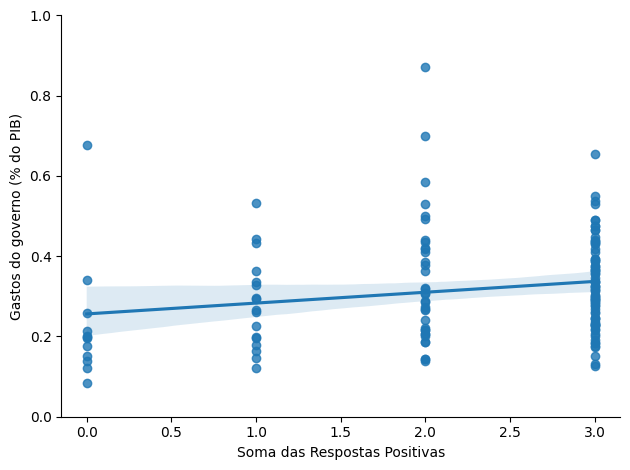

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(data=dispersao, y='Gastos do governo (% do PIB)', x='Soma das Respostas Positivas')

plt.ylim(0, 1)
sns.despine()
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/dispersao_ticegov_govexpenditure.png', dpi=300, bbox_inches='tight')
plt.show()